## Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 📊
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

In [543]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras

# Explorar dataset

In [544]:
# Lectura del csv
df = pd.read_csv(r"Datos_TP_final.csv")

In [545]:
df.head(3)

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,...,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,H_Nov,H_Dic,H_Ene,Unnamed: 34
0,2001/02,Neutro,TEMPEL N2,64.8,353,140,156,52,moderadamente susceptible,0.21,...,0.61,0.62,0.49,0.47,0.51,6675,1458,677,1064,NaN
1,2001/02,Neutro,3D,118.4,353,140,156,34,practicamente no susceptible,0.51,...,0.30,0.58,0.19,0.16,0.30,8357,1463,696,1111,NaN
2,2001/02,Neutro,6NORTE,143.6,353,140,156,32,moderadamente susceptible,0.48,...,0.29,0.34,0.19,0.16,0.33,7296,1459,689,1093,NaN


In [546]:
# Visualizar las dimensiones del dataframe
df.shape
print("El dataframe tiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataframe tiene 176 filas y 35 columnas


In [547]:
# Obtén la columna "RINDE"
rinde_column = df.pop("RINDE")
# Agrega la columna "RINDE" al final del DataFrame
df["RINDE"] = rinde_column
df = df.drop(["Unnamed: 34", "CICLO", "LOTE"], axis=1)
df

,EVENTO,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,...,EVI 17 Ene media,EVI 17 Ene min,EVI 17 Ene max,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,H_Nov,H_Dic,H_Ene,RINDE
0,Neutro,64.8,353,140,156,52,moderadamente susceptible,0.21,0.20,0.24,...,0.62,0.61,0.62,0.49,0.47,0.51,1458,677,1064,6675
1,Neutro,118.4,353,140,156,34,practicamente no susceptible,0.51,0.46,0.62,...,0.38,0.30,0.58,0.19,0.16,0.30,1463,696,1111,8357
2,Neutro,143.6,353,140,156,32,moderadamente susceptible,0.48,0.46,0.51,...,0.31,0.29,0.34,0.19,0.16,0.33,1459,689,1093,7296
3,Neutro,143.1,358,136,120,32,moderadamente susceptible,0.33,0.25,0.48,...,0.59,0.45,0.76,0.47,0.32,0.60,1455,689,1092,4668
4,Neutro,69.4,337,153,170,50,moderadamente susceptible,0.37,0.24,0.43,...,0.51,0.48,0.53,0.30,0.29,0.34,1483,759,1239,5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Niña,92.3,231,367,399,40,moderadamente susceptible,0.34,0.30,0.39,...,0.56,0.53,0.59,0.39,0.34,0.41,783,1315,1483,6484
172,Niña,213.8,228,389,407,50,practicamente no susceptible,0.41,0.35,0.47,...,0.44,0.40,0.53,0.27,0.21,0.47,770,1328,1480,8030
173,Niña,79.1,231,367,399,73,levemente susceptible,0.34,0.32,0.38,...,0.54,0.50,0.68,0.26,0.25,0.28,783,1307,1490,6507
174,Niña,129.1,228,389,407,32,moderadamente susceptible,0.38,0.33,0.52,...,0.58,0.47,0.73,0.37,0.32,0.52,779,1318,1482,7896


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENTO             176 non-null    object 
 1   SUP                176 non-null    float64
 2   pp Nov             176 non-null    object 
 3   pp Dic             176 non-null    object 
 4   pp Ene             176 non-null    object 
 5   IPC                176 non-null    object 
 6   EROSION POTENCIAL  176 non-null    object 
 7   EVI 1 Nov media    176 non-null    float64
 8   EVI 1 Nov min      176 non-null    float64
 9   EVI 1 Nov max      176 non-null    float64
 10  EVI 17 Nov media   176 non-null    float64
 11  EVI 17 Nov min     176 non-null    float64
 12  EVI 17 Nov max     176 non-null    float64
 13  EVI 3 Dic media    176 non-null    float64
 14  EVI 3 Dic min      176 non-null    float64
 15  EVI 3 Dic max      176 non-null    float64
 16  EVI 19 Dic media   176 non

In [549]:
object_columns = df.select_dtypes(include=['object'])

print(object_columns.columns)

Index(['EVENTO', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC', 'EROSION POTENCIAL',
       'H_Nov', 'H_Dic', 'H_Ene'],
      dtype='object')


In [550]:
class ConvertObjectToInt:
    def __init__(self, df, columns_to_convert):
        self.df = df
        self.columns_to_convert = columns_to_convert

    def convert_columns(self):
        for column in self.columns_to_convert:
            if self.df[column].dtype == 'object':
                try:
                    # Intenta convertir valores válidos a numéricos y establecer los no válidos como NaN
                    self.df[column] = pd.to_numeric(self.df[column], errors='coerce')
                    # Rellena los NaN con un valor predeterminado (por ejemplo, 0)
                    self.df[column].fillna(0, inplace=True)
                    # Convierte la columna a tipo int
                    self.df[column] = self.df[column].astype(int)
                except ValueError as e:
                    print(f"Error al convertir la columna {column}: {e}")

In [551]:
columns_to_convert = ["pp Nov", "pp Dic", 'pp Ene', 'H_Nov', 'H_Dic', "H_Ene", "IPC"]

converter = ConvertObjectToInt(df, columns_to_convert)
converter.convert_columns()

# Graficos

In [552]:
df_categorico = df.select_dtypes(exclude=['object'])

In [553]:
# Columnas para EVI media y EVI min/max de cada mes
columns_to_average = [
    'EVI 1 Nov media', 'EVI 17 Nov media',
    'EVI 3 Dic media', 'EVI 19 Dic media',
    'EVI 1 Ene media', 'EVI 17 Ene media',
    'EVI 2 Feb media']

columns_to_min_max = [
    'EVI 1 Nov min', 'EVI 17 Nov min',
    'EVI 1 Nov max', 'EVI 17 Nov max',
    'EVI 3 Dic min', 'EVI 19 Dic min',
    'EVI 3 Dic max', 'EVI 19 Dic max',
    'EVI 1 Ene min', 'EVI 17 Ene min',
    'EVI 1 Ene max', 'EVI 17 Ene max',
    'EVI 2 Feb min', 'EVI 2 Feb max'
]

# Crea nuevos DataFrames para EVI media y EVI min/max
df_monthly_media = df[columns_to_average]
df_monthly_min_max = df[columns_to_min_max]

# Calcula los promedios para EVI media
df['EVI Nov mean'] = df_monthly_media[['EVI 1 Nov media', 'EVI 17 Nov media']].mean(axis=1)
df['EVI Dic mean'] = df_monthly_media['EVI 3 Dic media']
df['EVI Ene mean'] = df_monthly_media[['EVI 1 Ene media', 'EVI 17 Ene media']].mean(axis=1)
df['EVI Feb mean'] = df_monthly_media['EVI 2 Feb media']

# Calcula los promedios para EVI min/max
df['EVI Nov min'] = df_monthly_min_max[['EVI 1 Nov min', 'EVI 17 Nov min']].mean(axis=1)
df['EVI Nov max'] = df_monthly_min_max[['EVI 1 Nov max', 'EVI 17 Nov max']].mean(axis=1)
df['EVI Dic min'] = df_monthly_min_max[['EVI 3 Dic min', 'EVI 19 Dic min']].mean(axis=1)
df['EVI Dic max'] = df_monthly_min_max[['EVI 3 Dic max', 'EVI 19 Dic max']].mean(axis=1)
df['EVI Ene min'] = df_monthly_min_max[['EVI 1 Ene min', 'EVI 17 Ene min']].mean(axis=1)
df['EVI Ene max'] = df_monthly_min_max[['EVI 1 Ene max', 'EVI 17 Ene max']].mean(axis=1)
df['EVI Feb min'] = df_monthly_min_max[['EVI 2 Feb min']].copy()
df['EVI Feb max'] = df_monthly_min_max[['EVI 2 Feb max']].copy()

# Elimina las columnas originales de EVI media y EVI min/max
df.drop(columns=columns_to_average + columns_to_min_max, inplace=True)

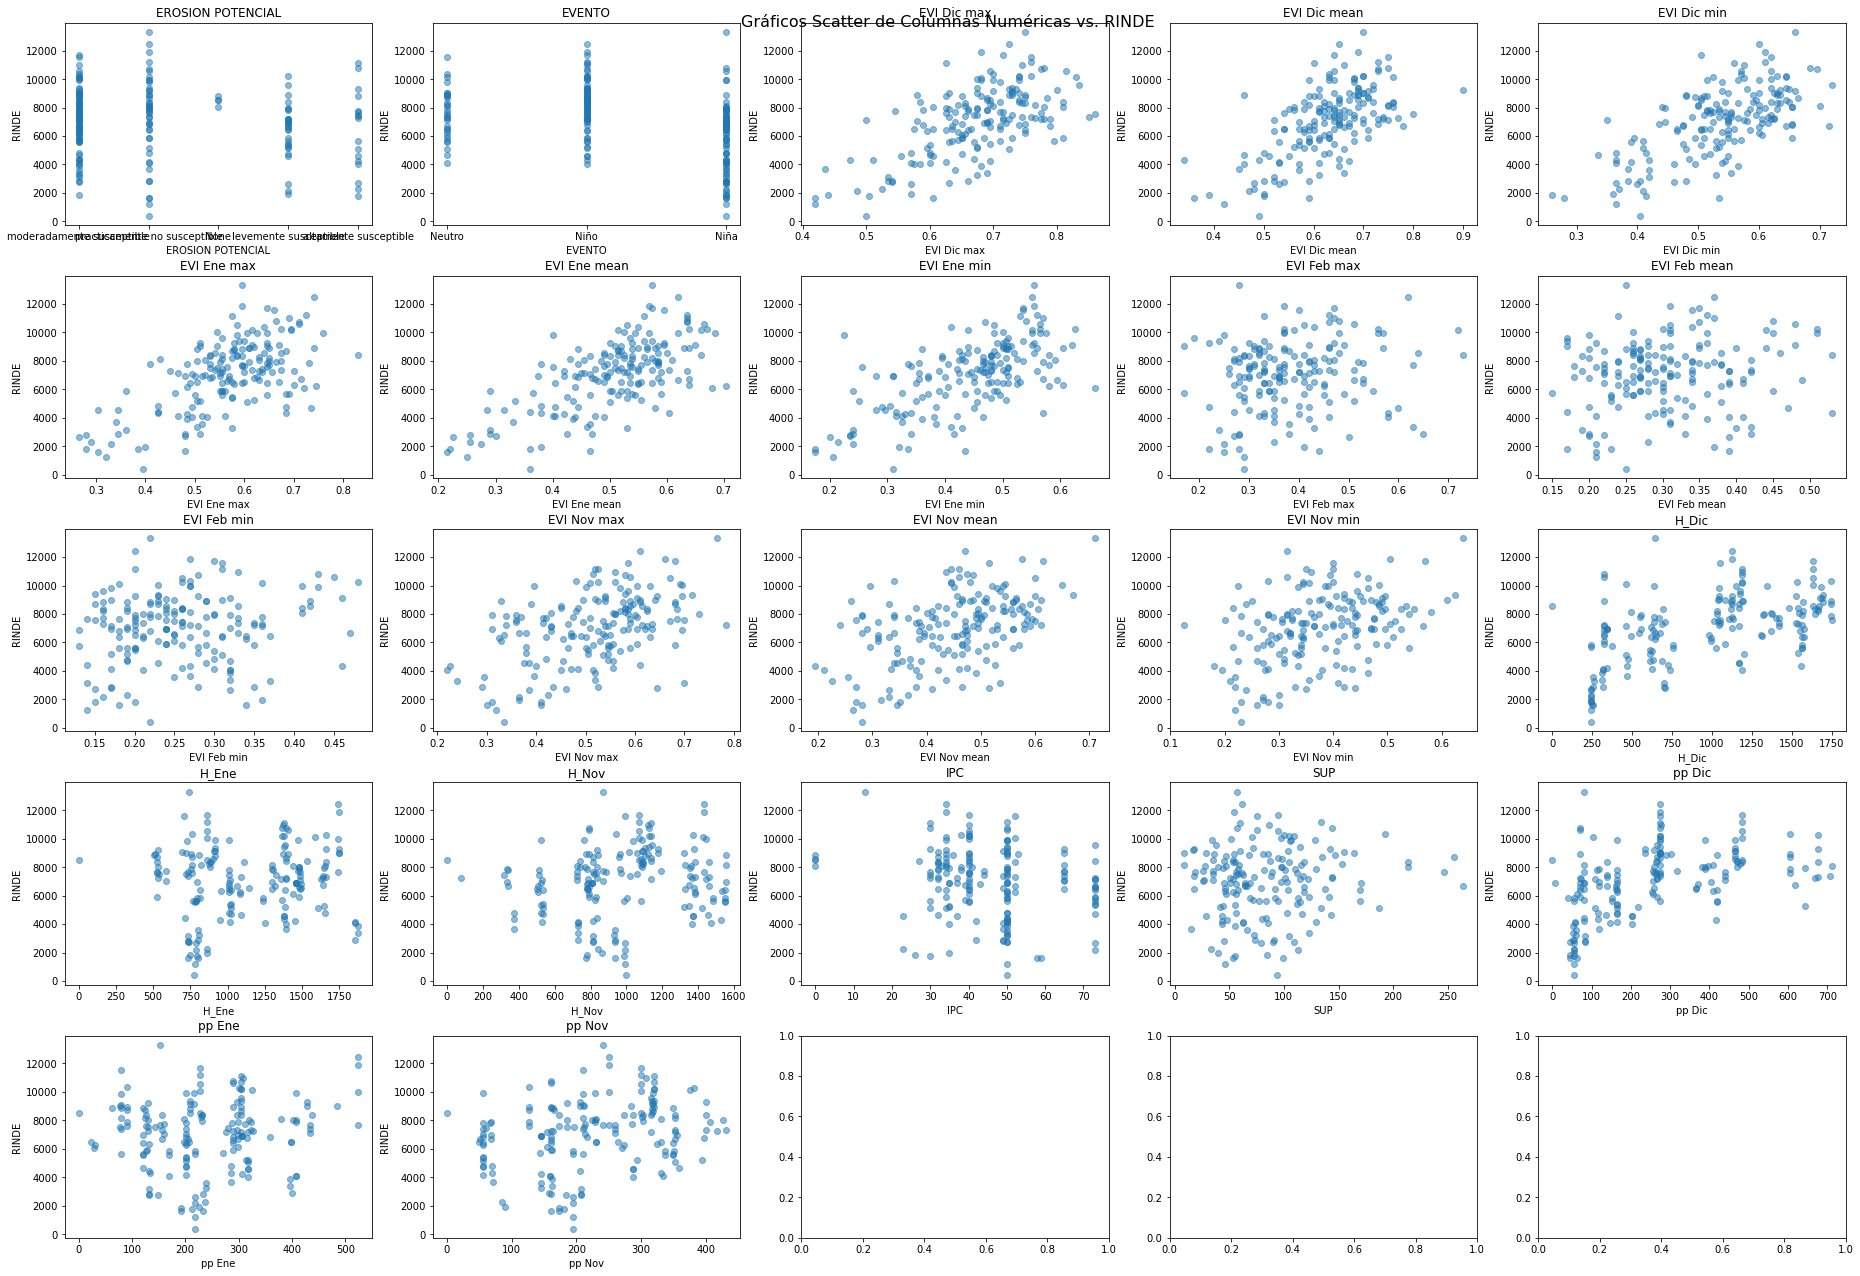

In [554]:
# Obtén la lista de todas las columnas numéricas (excluyendo 'RINDE')
columnas_numericas = df.columns.difference(['RINDE'])

# Define el número de filas y columnas para la disposición de los gráficos
num_filas = 5  # Cambia esto según tus preferencias
num_columnas = 5  # Cambia esto según tus preferencias

# Crea un nuevo plot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(26, 18))
fig.tight_layout(pad=3.0)  # Ajusta el espaciado entre los gráficos

# Itera a través de las columnas numéricas y crea los gráficos scatter
for i, columna in enumerate(columnas_numericas):
    fila = i // num_columnas
    columna_actual = i % num_columnas
    axs[fila, columna_actual].scatter(df[columna], df['RINDE'], alpha=0.5)
    axs[fila, columna_actual].set_title(columna)
    axs[fila, columna_actual].set_xlabel(columna)
    axs[fila, columna_actual].set_ylabel('RINDE')

# Añade un título general al gran plot
plt.suptitle("Gráficos Scatter de Columnas Numéricas vs. RINDE", fontsize=16)

# Muestra el plot
plt.show()

In [555]:
print(df.columns)

Index(['EVENTO', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'H_Nov', 'H_Dic', 'H_Ene', 'RINDE', 'EVI Nov mean',
       'EVI Dic mean', 'EVI Ene mean', 'EVI Feb mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max', 'EVI Feb min', 'EVI Feb max'],
      dtype='object')


In [556]:
# Seleccionar las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Feb mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max', 'EVI Feb min', 'EVI Feb max','RINDE']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reduc = df[columnas_seleccionadas]

In [557]:
X = df_reduc.drop(columns=['RINDE'])  
y = df_reduc['RINDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convierte los arrays de NumPy a DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Funciones Aux

# Preprosesamiento

In [558]:
# class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
#     def __init__(self, columns_to_encode):
#         self.columns_to_encode = columns_to_encode
#         self._oh = OneHotEncoder(sparse=False)
#         self._columns = None

#     def fit(self, X, y=None):
#         X_cat = X[self.columns_to_encode]
#         self._columns = pd.get_dummies(X_cat).columns
#         self._oh.fit(X_cat)
#         return self

#     def transform(self, X, y=None):
#         X_copy = X.copy()
#         X_cat = X_copy[self.columns_to_encode]
#         X_num = X_copy.drop(self.columns_to_encode, axis=1)
#         X_cat_oh = self._oh.transform(X_cat)
#         X_cat_oh = pd.DataFrame(X_cat_oh,
#                                 columns=self._columns,
#                                 index=X_copy.index)
#         X_copy = X_num.join(X_cat_oh)
#         return X_copy

In [559]:
# # Definir las columnas que deseas codificar
# columns_to_encode = ['EVENTO', 'EROSION POTENCIAL']

# # Crear una instancia de CustomOneHotEncoding
# custom_encoder = CustomOneHotEncoding(columns_to_encode)

# # A continuación, puedes ajustar y transformar tu DataFrame
# X_train_dum = custom_encoder.fit_transform(X_train)
# X_test_dum = custom_encoder.fit_transform(X_test)

In [560]:
# class CustomScaler(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         self.robust_scaler = RobustScaler()
#         self.robust_scaler.fit(X)
#         return self
    
#     def transform(self, X, y=None):
#         X_scaled = self.robust_scaler.transform(X)
#         X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#         return X_scaled_df

In [561]:
# custom_scaler = CustomScaler()

# X_train_pro = custom_scaler.fit_transform(X_train_dum)
# X_test_pro = custom_scaler.fit_transform(X_test_dum)

In [562]:
# X_train_pro

In [563]:
# class SyntheticDataGenerator:
#     def __init__(self, df):
#         self.df = df
    
#     def generate_synthetic_examples(self, num_examples=100, noise_level=0.01):
#         # Obtener las columnas binarias (0 o 1)
#         binary_columns = [col for col in self.df.columns if set(self.df[col]) == {0, 1}]
        
#         # Obtener las columnas con valores continuos
#         continuous_columns = [col for col in self.df.columns if col not in binary_columns]
        
#         synthetic_examples = []
        
#         for _ in range(num_examples):
#             # Generar una nueva fila sintética
#             synthetic_example = {}
            
#             # Copiar valores de columnas binarias
#             for col in binary_columns:
#                 synthetic_example[col] = np.random.choice([0, 1])
            
#             # Copiar valores de columnas con valores continuos y agregar ruido
#             for col in continuous_columns:
#                 original_value = np.random.choice(self.df[col])
#                 noise = np.random.normal(0, noise_level)
#                 synthetic_value = original_value + noise
#                 synthetic_example[col] = synthetic_value
            
#             synthetic_examples.append(synthetic_example)
        
#         # Crear un nuevo DataFrame con los ejemplos sintéticos
#         synthetic_df = pd.DataFrame(synthetic_examples)
        
#         # Concatenar los ejemplos sintéticos con el DataFrame original
#         combined_df = pd.concat([self.df, synthetic_df], ignore_index=True)
        
#         return combined_df

# Modelado

### Regresion Lineal

In [564]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 2431369.5951379593
Coeficiente de determinación (R^2): 0.5033800649417379


### RF

In [569]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = random_forest.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 2031108.2742641512
Coeficiente de determinación (R^2): 0.5851355296708285


# SMV

In [566]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de SVM para regresión
svm_regressor = SVR(kernel='poly', degree=3)

# Entrenar el modelo en los datos de entrenamiento
svm_regressor.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_regressor.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 2258064.4962137807
Coeficiente de determinación (R^2): 0.5387785362992394


### RNN

In [567]:
model = models.Sequential()

model.add(layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='linear'))


optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='mean_squared_error',  # Cambia a 'mean_squared_error'
              metrics=['mean_absolute_error'])  # Opcional: métrica de error absoluto medio

In [568]:
# history1 = model.fit(X_train,
#                    y_train,
#                    epochs=200,
#                    batch_size=1)                 